<a href="https://colab.research.google.com/github/Airinelizabath/Association-Rule-Mining/blob/13-01-2021-filter-try/exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Initialize**

In [2]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [1]:
%pip install mlxtend --upgrade

In [3]:
df = pd.read_csv('/content/drive/MyDrive/file.txt')

In [ ]:
df.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [ ]:
df.shape

(5485, 1)

In [ ]:
df.describe()

,5485
count,5485
unique,5427
top,4 agency reports ships waiting at panama canal...
freq,3


In [4]:
def get_label(text):
     for i in text:
            return int(i[0])

In [5]:
df['label'] = df['5485'].apply(lambda x: get_label(x))

In [ ]:
df.head()

,5485,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [6]:
df.columns = ('text', 'label')
df['text']=df['text'].str[1:]

In [ ]:
df.head()

,text,label
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1


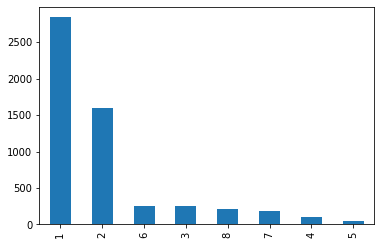

In [7]:
df.label.value_counts().plot(kind='bar')

In [ ]:
#remove special characters and punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9 ]+', '')

#remove single letters from text
df['text'] = df['text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

In [ ]:
df.head()

,text,label
0,champion products ch approves stock split cham...,1
1,computer terminal systems cpml completes sale ...,2
2,cobanco inc cbco year net shr cts vs dlrs net ...,1
3,am international inc am nd qtr jan oper shr lo...,1
4,brown forman inc bfd th qtr net shr one dlr vs...,1


### **KERAS - MLXTENT**


1.   reuters dataset
2.   keras tokenizer
3.   labels not included



In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
p=list(tokenizer.word_index.keys())
print(f'Vocabulary: {p}')
vectors = tokenizer.texts_to_matrix(df['text'], mode='binary')
print(vectors)

Vocabulary: ['the', 'of', 'to', 'in', 'said', 'a', 'and', 'mln', 'vs', 'dlrs', 's', 'for', 'it', 'cts', 'reuter', 'net', 'its', 'loss', 'on', 'year', 'pct', 'from', 'is', 'that', 'company', 'by', 'will', 'inc', 'with', 'be', 'shr', 'at', 'has', 'he', 'profit', 'was', 'share', 'corp', 'u', 'billion', 'would', 'an', 'as', 'not', 'shares', 'or', 'bank', 'qtr', 'which', 'revs', 'stock', 'one', 'oil', 'but', 'trade', 'had', 'about', 'group', 'two', 'also', 'have', 'last', 'this', 'are', 'co', 'sales', 'new', 'april', 'were', 'march', 'note', 'quarter', 'per', 'offer', 'first', 'market', 'oper', 'they', 'up', 'record', 'dividend', 'ltd', 'been', 'may', 'dlr', 'earnings', 'tax', 'three', 'more', 'after', 'th', 'agreement', 'other', 'japan', 'common', 'sale', 'exchange', 'international', 'board', 'avg', 'shrs', 'rate', 'six', 'unit', 'than', 'pay', 'five', 'stake', 'prior', 'we', 'acquisition', 'interest', 'told', 'if', 'shareholders', 'cash', 'their', 'government', 'div', 'today', 'over', 'no

In [ ]:
p.insert(0,'#')
p

['#',
 'the',
 'of',
 'to',
 'in',
 'said',
 'a',
 'and',
 'mln',
 'vs',
 'dlrs',
 's',
 'for',
 'it',
 'cts',
 'reuter',
 'net',
 'its',
 'loss',
 'on',
 'year',
 'pct',
 'from',
 'is',
 'that',
 'company',
 'by',
 'will',
 'inc',
 'with',
 'be',
 'shr',
 'at',
 'has',
 'he',
 'profit',
 'was',
 'share',
 'corp',
 'u',
 'billion',
 'would',
 'an',
 'as',
 'not',
 'shares',
 'or',
 'bank',
 'qtr',
 'which',
 'revs',
 'stock',
 'one',
 'oil',
 'but',
 'trade',
 'had',
 'about',
 'group',
 'two',
 'also',
 'have',
 'last',
 'this',
 'are',
 'co',
 'sales',
 'new',
 'april',
 'were',
 'march',
 'note',
 'quarter',
 'per',
 'offer',
 'first',
 'market',
 'oper',
 'they',
 'up',
 'record',
 'dividend',
 'ltd',
 'been',
 'may',
 'dlr',
 'earnings',
 'tax',
 'three',
 'more',
 'after',
 'th',
 'agreement',
 'other',
 'japan',
 'common',
 'sale',
 'exchange',
 'international',
 'board',
 'avg',
 'shrs',
 'rate',
 'six',
 'unit',
 'than',
 'pay',
 'five',
 'stake',
 'prior',
 'we',
 'acquisitio

In [ ]:
len(p)

19983

In [ ]:
np.shape(vectors)

(5485, 19983)

In [ ]:
'''vect=[]
vect.append(list(tokenizer.word_index.keys()))'''

In [ ]:
'''for i in range(vectors.shape[0]):
  vect.append(vectors[i])
#vect.append(vectors)'''
#np.concatenate(key,vectors)
newarr = pd.DataFrame(vectors, columns=p)
newarr.head()

,#,the,of,to,in,said,a,and,mln,vs,dlrs,s,for,it,cts,reuter,net,its,loss,on,year,pct,from,is,that,company,by,will,inc,with,be,shr,at,has,he,profit,was,share,corp,u,...,sptnd,caisses,populaires,economie,capco,superfund,robintech,amdc,extracting,bfr,dmk,dfl,lit,dkr,nkr,ffr,skr,mrk,sfr,sch,irn,lib,drhm,motions,ramifications,prefered,contends,hampers,moss,sincerely,neighbour,agronomics,agr,kly,urgings,cvt,midrate,barrie,unsworth,steeply
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
%pip install mlxtend --upgrade

In [ ]:
df['label']

0       1
1       2
2       1
3       1
4       1
       ..
5480    1
5481    8
5482    1
5483    8
5484    4
Name: label, Length: 5485, dtype: int64

In [ ]:
newarr['#key'] = df['label']

In [ ]:
newarr=newarr.drop(['#','#key'],axis=1 )

In [ ]:
'''import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df['label']).transform(df['label'])
ddf = pd.DataFrame(te_ary, columns=te.columns_)'''

In [ ]:
#newarr=newarr.drop('#key',axis=1)

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
fp=fpgrowth(newarr, min_support=0.5, use_colnames=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules
association_rules(fp, metric='confidence', min_threshold=0.2, support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(of),(reuter),0.674749,0.911395,0.656335,0.972710,1.067276,0.041373,3.246814
1,(reuter),(of),0.911395,0.674749,0.656335,0.720144,1.067276,0.041373,1.162207
2,(reuter),(to),0.911395,0.586509,0.551322,0.604921,1.031393,0.016781,1.046604
3,(to),(reuter),0.586509,0.911395,0.551322,0.940006,1.031393,0.016781,1.476908
4,(of),(to),0.674749,0.586509,0.519599,0.770062,1.312960,0.123853,1.798274
...,...,...,...,...,...,...,...,...,...
85,"(of, and)",(reuter),0.526162,0.911395,0.520875,0.989951,1.086194,0.041334,8.817754
86,"(and, reuter)",(of),0.566089,0.674749,0.520875,0.920129,1.363660,0.138907,4.072191
87,(of),"(and, reuter)",0.674749,0.566089,0.520875,0.771954,1.363660,0.138907,1.902729
88,(reuter),"(of, and)",0.911395,0.526162,0.520875,0.571514,1.086194,0.041334,1.105843


In [ ]:
'''from keras.preprocessing.text import Tokenizer
docs = ['Marvellous Machine Learning Marvellous Machine Learning',
		'Amazing Artificial Intelligence',
		'Dazzling Deep Learning',
		'Champion Computer Vision',
		'Notorious Natural Language Processing Notorious Natural Language Processing']
# create the tokenizer
t = Tokenizer()

t.fit_on_texts(docs)

encoded_docs = t.texts_to_matrix(docs, mode='binary')
print("The word index",list(t.word_index.keys()))
print(encoded_docs)
  # first column is always 0'''

### **COUNTVECTORIZER**
1. sklearn
2. reuters dataset
3. labels not included
4. countvectorizer 
5. mlxtent

In [1]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 13.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/file.txt')

In [4]:
df.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [5]:
df.shape

(5485, 1)

In [6]:
def get_label(text):
     for i in text:
            return int(i[0])

In [7]:
df['label'] = df['5485'].apply(lambda x: get_label(x))

In [8]:
df.columns = ('text', 'label')
df['text']=df['text'].str[1:]

In [9]:
df.head()

,text,label
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1


In [10]:
#remove special characters and punctuation
df['text'] = df['text'].replace(r'[^A-Za-z0-9 ]+', '')

#remove single letters from text
df['text'] = df['text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

In [11]:
df.head()

,text,label
0,champion products ch approves stock split cham...,1
1,computer terminal systems cpml completes sale ...,2
2,cobanco inc cbco year net shr cts vs dlrs net ...,1
3,am international inc am nd qtr jan oper shr lo...,1
4,brown forman inc bfd th qtr net shr one dlr vs...,1


In [12]:
vectorizer = CountVectorizer(stop_words='english', binary=True)

In [13]:
X_vect = vectorizer.fit_transform(df['text'])

In [14]:
type(X_vect)

scipy.sparse.csr.csr_matrix

In [15]:
import scipy.sparse
A=pd.DataFrame.sparse.from_spmatrix(X_vect)

In [16]:
type(A)

pandas.core.frame.DataFrame

In [17]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,19639,19640,19641,19642,19643,19644,19645,19646,19647,19648,19649,19650,19651,19652,19653,19654,19655,19656,19657,19658,19659,19660,19661,19662,19663,19664,19665,19666,19667,19668,19669,19670,19671,19672,19673,19674,19675,19676,19677,19678
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
 FEAT=vectorizer.get_feature_names_out()

In [19]:
type(FEAT)

numpy.ndarray

In [20]:
FEAT.tolist()

['aa',
 'aaa',
 'aac',
 'aachener',
 'aagiy',
 'aaix',
 'aam',
 'aancor',
 'aap',
 'aar',
 'aare',
 'aarn',
 'aarnoud',
 'aaron',
 'aati',
 'ab',
 'abal',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abatement',
 'abbas',
 'abbett',
 'abbey',
 'abbreviated',
 'abc',
 'abdel',
 'abdelaziz',
 'abdul',
 'abdulaziz',
 'abdullah',
 'abercrombie',
 'abev',
 'abex',
 'abf',
 'abi',
 'abide',
 'abiding',
 'abidjan',
 'abilene',
 'abilities',
 'ability',
 'ablaze',
 'able',
 'abm',
 'abn',
 'abnn',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'abort',
 'aborted',
 'abover',
 'abraham',
 'abroad',
 'abrupt',
 'abs',
 'absb',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolve',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstain',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abuses',
 'abusing',
 'abusive',
 'abx',
 'abz',
 'ac',
 'academics',
 'academy',
 'acccounts',
 'accelerate',
 'accelerated',
 'accelerating',
 'accel

In [21]:
A.columns=FEAT

In [22]:
A

,aa,aaa,aac,aachener,aagiy,aaix,aam,aancor,aap,aar,aare,aarn,aarnoud,aaron,aati,ab,abal,abandon,abandoned,abandoning,abandonment,abatement,abbas,abbett,abbey,abbreviated,abc,abdel,abdelaziz,abdul,abdulaziz,abdullah,abercrombie,abev,abex,abf,abi,abide,abiding,abidjan,...,zeebrugge,zegl,zeitung,zen,zenith,zentralbank,zentralsparkasse,zero,zfour,zhao,zhejiang,zhou,zico,ziegler,ziering,zim,zimbabwe,zimmer,zimoil,zimr,zinc,ziyang,znat,zoete,zolotukhin,zond,zondervan,zone,zones,zorinsky,zubedei,zubeidi,zuccherifici,zuckerman,zulia,zur,zurich,zuyuan,zy,zzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
'''for i in range(5485):
  A.re'''

'for i in range(5485):\n  A.re'

In [24]:
A['abbey'][26]

0

In [25]:
A['#'] = df['label'] 

In [26]:
A['#']

0       1
1       2
2       1
3       1
4       1
       ..
5480    1
5481    8
5482    1
5483    8
5484    4
Name: #, Length: 5485, dtype: int64

In [27]:
df2 = A.join(pd.get_dummies(A.pop('#'))) #label to binary

In [28]:
df2

,aa,aaa,aac,aachener,aagiy,aaix,aam,aancor,aap,aar,aare,aarn,aarnoud,aaron,aati,ab,abal,abandon,abandoned,abandoning,abandonment,abatement,abbas,abbett,abbey,abbreviated,abc,abdel,abdelaziz,abdul,abdulaziz,abdullah,abercrombie,abev,abex,abf,abi,abide,abiding,abidjan,...,zfour,zhao,zhejiang,zhou,zico,ziegler,ziering,zim,zimbabwe,zimmer,zimoil,zimr,zinc,ziyang,znat,zoete,zolotukhin,zond,zondervan,zone,zones,zorinsky,zubedei,zubeidi,zuccherifici,zuckerman,zulia,zur,zurich,zuyuan,zy,zzzz,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
'''df3=df2.iloc[:,10000:]
df3.to_excel("/content/output.xlsx")'''

'df3=df2.iloc[:,10000:]\ndf3.to_excel("/content/output.xlsx")'

In [30]:
'''import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(X_vect).transform(X_vect)
ddf = pd.DataFrame(te_ary, columns=te.columns_)'''

'import pandas as pd\nfrom mlxtend.preprocessing import TransactionEncoder\nte = TransactionEncoder()\nte_ary = te.fit(X_vect).transform(X_vect)\nddf = pd.DataFrame(te_ary, columns=te.columns_)'

In [31]:
#search=A.isin(['2']).any()

In [32]:
#search

In [33]:
#one=int(2/2)
#search[search==True]

In [34]:
#search

In [35]:
from mlxtend.frequent_patterns import fpgrowth
fp=fpgrowth(df2, min_support=0.2, use_colnames=True)

In [36]:
from mlxtend.frequent_patterns import association_rules
asr=association_rules(fp, metric='confidence', min_threshold=0.2, support_only=False)

In [37]:
association_rules(fp, metric='confidence', min_threshold=0, support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(reuter),(said),0.911395,0.565360,0.554786,0.608722,1.076697,0.039520,1.110821
1,(said),(reuter),0.565360,0.911395,0.554786,0.981296,1.076697,0.039520,4.737328
2,(1),(reuter),0.517776,0.911395,0.487694,0.941901,1.033473,0.015796,1.525085
3,(reuter),(1),0.911395,0.517776,0.487694,0.535107,1.033473,0.015796,1.037280
4,(mln),(reuter),0.490975,0.911395,0.473838,0.965095,1.058921,0.026365,2.538447
...,...,...,...,...,...,...,...,...,...
1217,(1),"(qtr, cts)",0.517776,0.205287,0.205105,0.396127,1.929623,0.098812,1.316026
1218,(qtr),"(1, cts)",0.224795,0.369189,0.205105,0.912409,2.471389,0.122113,7.201762
1219,(cts),"(1, qtr)",0.379398,0.223883,0.205105,0.540605,2.414675,0.120164,1.689434
1220,(reuter),(corp),0.911395,0.294075,0.284594,0.312262,1.061847,0.016576,1.026446


In [49]:
asr["antecedent_len"] = asr["antecedents"].apply(lambda x: len(x))
asr["conseqent_len"]=asr["consequents"].apply(lambda x: len(x))
#p=['sdvb',2,3,4,'dshbs','gshdg',5]
y = lambda x : [any([str(ele).isdigit() for ele in i]) for i in x ]
#asr["contains"]=asr["antecedents"].apply(lambda x : [any([str(ele).isdigit() for ele in i]) for i in x ])
asr["contains"]=y(asr['antecedents'])
asr["contains_conseq"]=y(asr['consequents'])
#item=[1,2,3,4,5,6,7,8]
#asr[asr['antecedents']=={item}]
#only outputs first true value
asr[(asr['antecedent_len'] > 1) & (asr['lift']>=1 ) & (asr['contains']==True) & (asr['contains_conseq']==True) ]  #either antecedent or consequent works ; not both
#asr[(asr['antecedents']=={1}) | (asr['antecedents']=={2})| (asr['antecedents']=={3})| (asr['antecedents']=={4})| (asr['antecedents']=={5})| (asr['antecedents']=={6})| (asr['antecedents']=={7})| (asr['antecedents']=={8})]

# ?? why consequent does not have any label categories. There are around 5485 rows × 19679 columns of data. Also only 1 and 2 are present.  ->  bcz most of the antecedent which have numbers in antecent may not have cosequent numbers because of the non-overlapping of same labels is rare

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,contains,contains_conseq,conseqent_len


In [46]:
asr[(asr['conseqent_len'] > 1) & (asr['lift']>=1 ) & (asr['contains_conseq']==True) ]  #either antecedent or consequent works ; not both


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,contains,contains_conseq,conseqent_len
14,(mln),"(1, reuter)",0.490975,0.487694,0.296263,0.603416,1.237285,0.056817,1.291799,1,False,True,2
15,(reuter),"(1, mln)",0.911395,0.305196,0.296263,0.325065,1.065103,0.018109,1.029438,1,False,True,2
56,(dlrs),"(1, reuter)",0.420966,0.487694,0.210027,0.498917,1.023014,0.004725,1.022399,1,False,True,2
57,(reuter),"(1, dlrs)",0.911395,0.218414,0.210027,0.230446,1.055089,0.010966,1.015635,1,False,True,2
65,(reuter),"(2, said)",0.911395,0.262716,0.256700,0.281656,1.072092,0.017262,1.026366,1,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,(reuter),"(1, qtr)",0.911395,0.223883,0.211486,0.232046,1.036461,0.007440,1.010630,1,False,True,2
1212,(qtr),"(1, vs)",0.224795,0.364995,0.207840,0.924574,2.533112,0.125790,8.418931,1,False,True,2
1213,(vs),"(1, qtr)",0.365725,0.223883,0.207840,0.568295,2.538354,0.125960,1.797795,1,False,True,2
1218,(qtr),"(1, cts)",0.224795,0.369189,0.205105,0.912409,2.471389,0.122113,7.201762,1,False,True,2


In [48]:
asr[(asr['antecedent_len'] > 1) & (asr['lift']>=1 ) & (asr['contains']==True) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,contains,contains_conseq,conseqent_len
10,"(1, mln)",(reuter),0.305196,0.911395,0.296263,0.970729,1.065103,0.018109,3.027046,2,True,False,1
11,"(1, reuter)",(mln),0.487694,0.490975,0.296263,0.607477,1.237285,0.056817,1.296801,2,True,False,1
52,"(1, dlrs)",(reuter),0.218414,0.911395,0.210027,0.961603,1.055089,0.010966,2.307590,2,True,False,1
53,"(1, reuter)",(dlrs),0.487694,0.420966,0.210027,0.430654,1.023014,0.004725,1.017016,2,True,False,1
62,"(2, reuter)",(said),0.259070,0.565360,0.256700,0.990852,1.752603,0.110232,47.509487,2,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,"(1, reuter)",(qtr),0.487694,0.224795,0.211486,0.433645,1.929069,0.101855,1.368761,2,True,False,1
1208,"(1, qtr)",(vs),0.223883,0.365725,0.207840,0.928339,2.538354,0.125960,8.851023,2,True,False,1
1209,"(1, vs)",(qtr),0.364995,0.224795,0.207840,0.569431,2.533112,0.125790,1.800418,2,True,False,1
1214,"(1, qtr)",(cts),0.223883,0.379398,0.205105,0.916124,2.414675,0.120164,7.399018,2,True,False,1


In [40]:
asr

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,contains,contains_conseq
0,(reuter),(said),0.911395,0.565360,0.554786,0.608722,1.076697,0.039520,1.110821,1,False,False
1,(said),(reuter),0.565360,0.911395,0.554786,0.981296,1.076697,0.039520,4.737328,1,False,False
2,(1),(reuter),0.517776,0.911395,0.487694,0.941901,1.033473,0.015796,1.525085,1,True,False
3,(reuter),(1),0.911395,0.517776,0.487694,0.535107,1.033473,0.015796,1.037280,1,False,True
4,(mln),(reuter),0.490975,0.911395,0.473838,0.965095,1.058921,0.026365,2.538447,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1217,(1),"(qtr, cts)",0.517776,0.205287,0.205105,0.396127,1.929623,0.098812,1.316026,1,True,False
1218,(qtr),"(1, cts)",0.224795,0.369189,0.205105,0.912409,2.471389,0.122113,7.201762,1,False,True
1219,(cts),"(1, qtr)",0.379398,0.223883,0.205105,0.540605,2.414675,0.120164,1.689434,1,False,True
1220,(reuter),(corp),0.911395,0.294075,0.284594,0.312262,1.061847,0.016576,1.026446,1,False,False


In [41]:
'''p=[('sdvb',2),(3,4),('dshbs'),('gshdg',5)]
y = lambda x : [any([str(ele).isdigit() for ele in i]) for i in x ]
y(p)'''

"p=[('sdvb',2),(3,4),('dshbs'),('gshdg',5)]\ny = lambda x : [any([str(ele).isdigit() for ele in i]) for i in x ]\ny(p)"

### **Pyfpgrowth**

Failed

In [ ]:
pip install pyfpgrowth

     |████████████████████████████████| 1.6 MB 25.9 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5504 sha256=364d7f786990e709540c1345dc17c5f490265717661744e70a58e8eaf69cf91b
  Stored in directory: /root/.cache/pip/wheels/73/97/4b/f12ac994f6bbb99597396255435824c73ad3916be1e678be55
Successfully built pyfpgrowth


In [ ]:
import pyfpgrowth
patterns = pyfpgrowth.find_frequent_patterns(df, 2)

In [ ]:
patterns

{('e',): 2, ('l',): 2, ('t',): 2}